### Course
Stochastic methods for finance

### Student 
Luca Menti

### ID
2063594

### e-mail
luca.menti@studenti.unipd.it

### Course
Physics of Data

### Teacher in charge
Martino Grasselli

### Year
2021-2022

# REPORT 6: Monte Carlo simulation to compute the price for different call options using Python

### The Aim

The aim of this report is to simulate the geometric Brownian motion and to compute Monte Carlo simulation in order to compute the price for different call options (European, Asian and path dependent options).
I decided to use Python Language for this report.

## 1) Simulate N trajectories (N free input of the script) for the GBM through a VBA code and visualise the paths in a figure


### Geometric Brownian Motion

Geometric Brownian Motion (GBM) is defined by S0>0 and the dynamics as defined in the following Stochastic Differential Equation (SDE):

$
dS_{t}= \mu S_{t} + \sigma S_{t} dW_{t}
$

Integrated Form:

$
• log S_{t}=log S_{0} + \int_{0}^{t}(\mu - \frac{\sigma ^{2}}{2})ds +  \int_{0}^{t}  \sigma dW_{t} 
$

$
• log S_{t}=log S_{0} +\mu - \frac{\sigma ^{2}}{2} +  \sigma W_{t}
$

$
• log S_{t} \sim N(log S_{0} +(\mu - \frac{\sigma ^{2}}{2})t , \sigma^{2} t)
$

Explicit expression:

$
S_{t}=S_{0}e^{(\mu - \frac{\sigma ^{2}}{2})t}+\sigma W_{t})
$

### The code

In this case I considered 100 simulations with $ \mu $= 0.1, $ T $=1, $ \sigma $ = 20% and $ S_{0} $ =100.

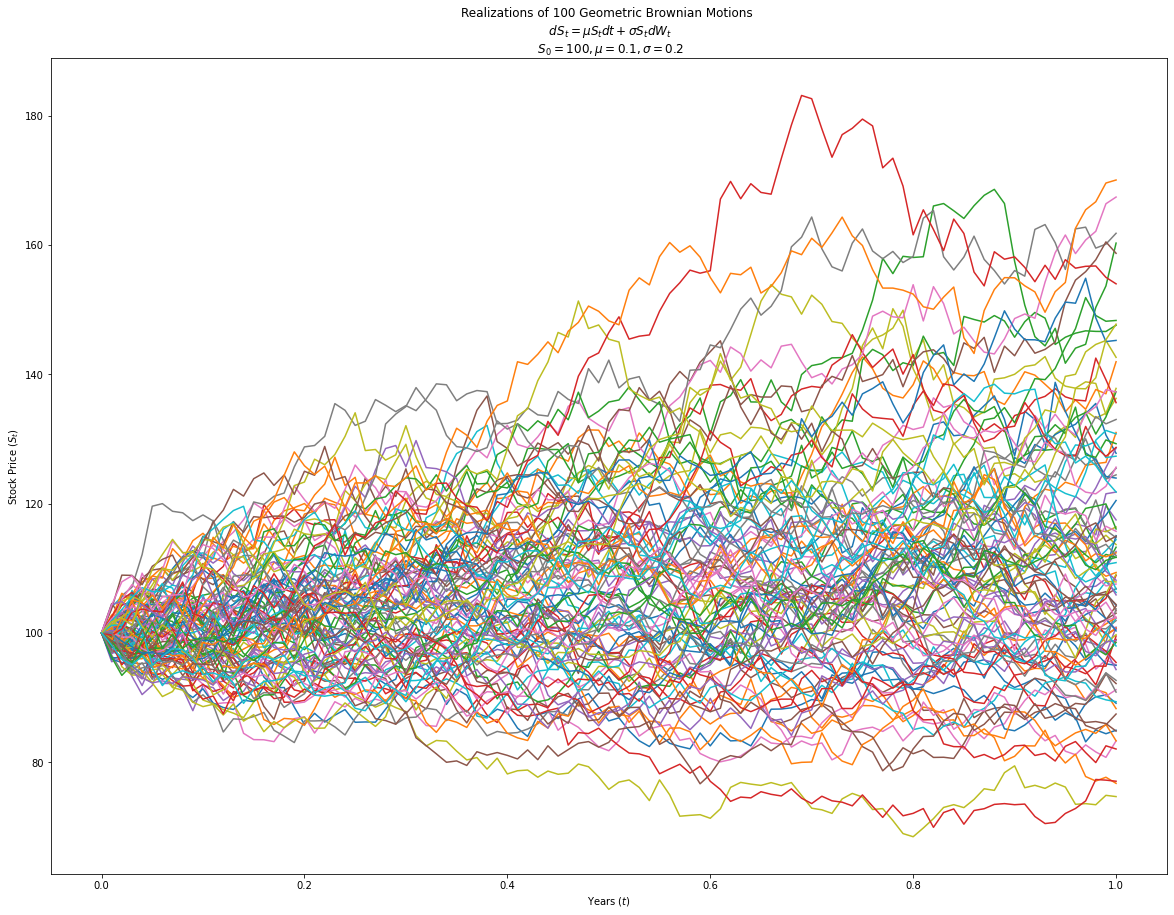

In [18]:

# Import dependencies
import math
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import time

# drift coefficent
mu = 0.1
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.20

# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)

# Define time interval correctly 
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

plt.rcParams["figure.figsize"] = (20,15)
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of 100 Geometric Brownian Motions \n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()

## 2) Build up a pricer of vanillas (call/put) through MC by 1 step simulation (that is by simulating N>500 values of the random variable $S_{T}$ not the entire path)

### Monte Carlo as tool for Financial Math
Valuation of Financial Derivatives through Monte Carlo Simulations is only possible by using the Financial Mathematics of Risk-Neutral Pricing and simulating risk-neutral asset paths.

$$
\frac{C_{t}}{B_{t}}= E_{Q}[ \frac{C_{T}}{B_{T}} | F_{t}]
$$

Note: This is the Risk-neutral Expectation Pricing Formula in Continuous Time.

Monte Carlo simulation is a way of solving probabilistic problems by numerically simulating possible scenarios so that you may calculate statistical properties of the outcomes, such as expectations, variances of probabilities of certain outcomes.

In the case of Financial Derivatives, this gives us a handly tool for which to price complex derivatives for which analytical formula is not possible.

First used by Boyle in 1977, Monte Carlo simulation provides an easy way to deal with multiple random factors and the incorporation of more realistic asset price processes such as jumps in asset prices.

We can solve two types of financial problems:

1) Portfolio statistics ( Brownian Motion is representive of Real probabilities under $ P $-measure)
- expected returns
- risk metrics (VaR, CVaR,..)
- downside risks
- other probabilities of interest


2) Pricing derivatives with risk-neutral pricing ( Brownian Motion is representative of risk-neutral probabilities under $ Q $-measure )


#### Valuation by Simulation

The risk-neutral pricing methodology tells us that:
- value  of an option = risk-neutral expectation of its discounted payoff

We can estimate this expectation by computing the avarage of a large number of discounted payoffs. For a particular simulation $ i $ :

$$
C_{0,i}= exp(- \int_{0}^{T} r_{s}ds)C_{T,i}= exp(-rT)C_{T,i}
$$

Now if we repeat the simulation $ M $ times, we can average the outcomes $  \hat{C_{0}} = \frac{1}{M} \sum_{i}^{M} C_{0,i} $


#### Standard Error $SE(\hat{C_{0}})$

$\hat{C_{0}}$ is an estimate of the true value of the option $ C_{0} $ with error due to the fact we are taking an average of randomly generated samples, and so therefore the calculation is itself random. A measure of this error is the standard deviation of  $\hat{C_{0}}$  called the standard error. This can be estimated as the standard deviation of $ C_{0,i} $ divided by the number of samples $ M $.

$$
SE(\hat{C_{0}}) = \frac{\sigma (C_{0,i)}}{\sqrt{M}}
$$

$$
\sigma(C_{0,i})=\sqrt{ \frac{1}{M-1} \sum_{i}^{M} (C_{0,i}-\hat{C_{0}})^2}
$$

### European Call Option in the Black-Scholes World

Here we have a constant interest rate so the discount factor is $ exp(-rT) $, and the stock dynamics are modelled with Geometric Brownian Motion (GMB)

$
dS_{t}= r S_{t} dt + \sigma S_{t} dW_{t}
$

Let's simulate this GBM process by simulating variables of the natural logarithm process of the stock price $ x_{t} = ln (S_{t}) $, which is normally distributed. For the dynamics of the natural logarithm process of stock prices under GBM model you need to use Ito's calculus.

$
dx_{t}= vdt + \sigma dz_{t} , v= r - \frac{1}{2} \sigma^{2}
$

We can then discretize the SDE by changing the infinitesimals $ dx, dt, dz $ into small steps $ \Delta x, \Delta t, \Delta z $.

$
\Delta x = \Delta t + \sigma \Delta z
$

This is the exact solution to the SDE and involves no approximation.

$
x_{t + \Delta t} = x_{t} + v( \Delta t) + \sigma (z_{t + \Delta t})
$

In terms of the stock price S, we have:

$
S_{t + \Delta t}= S_t exp(v( \Delta t) + \sigma (z_{t + \Delta t}))
$

Where $ ( z_{t + \Delta t}- z_t) \sim N(0, \Delta t) \sim \sqrt{\Delta t} N(0,1) \sim \sqrt{\Delta t} \epsilon_{i}$
 

For simple processes where the SDE does not need to be approximated like in the case of GBM (calculating an European Option Price), we can just simulate the variables at the final Time Step as Brownian and indipendent increments.

#### The code
The values used are $ S_0=100 , \sigma = 20 \%, r=1 \%, T=1year, K=99 , dt=1 day $

In [44]:
# initial derivative parameters 
S = 100         #stock price
K = 99           #strike price
vol = 0.20        #volatility (%)
r = 0.01            #risk-free rate (%)
N = 1              #number of time steps
M = 1000            #number of simulations

T = ((datetime.date(2022,7,15)-datetime.date.today()).days+1)/365    #time in years


#precompute constants
N = 1
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
lnS = np.log(S)

# Monte Carlo Method
Z = np.random.normal(size=(N, M)) 
delta_lnSt = nudt + volsdt*Z 
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )

# Compute Expectation and SE
ST = np.exp(lnSt)
CT = np.maximum(0, ST - K)
C0 = np.exp(-r*T)*np.sum(CT[-1])/M

sigma = np.sqrt( np.sum( (CT[-1] - C0)**2) / (M-1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))

Call value is $3.89 with SE +/- 0.17


## 3) Same as in 2) but using multiple step Euler-scheme based simulation with N>500 and compare the results

#### The code
The values use are $ S_0=100 , \sigma = 20 \%, r=1 \%, T=1year, K=99 , dt= \frac{T}{N} $

In [45]:
# initial derivative parameters 
S = 100          #stock price
K = 99         #strike price
vol = 0.20        #volatility (%)
r = 0.01            #risk-free rate (%)
N = 10              #number of time steps
M = 1000            #number of simulations


T = ((datetime.date(2022,7,15)-datetime.date.today()).days+1)/365    #time in years


#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
lnS = np.log(S)

# Monte Carlo Method
Z = np.random.normal(size=(N, M)) 
delta_lnSt = nudt + volsdt*Z 
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )

# Compute Expectation and SE
ST = np.exp(lnSt)
CT = np.maximum(0, ST - K)
C0 = np.exp(-r*T)*np.sum(CT[-1])/M

sigma = np.sqrt( np.sum( (CT[-1] - C0)**2) / (M-1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))

Call value is $3.78 with SE +/- 0.17


### Comparison between the 2 prices

The value of the call with 1-step simulation is higher than the one with multiple steps. It also intersting to see that the error is quite smaller in the multiple steps than in single step case


### Real Case

In order to check the efficency of the code I decided to take a real call option. Even if the code is for European call options it work quite well also for the American options so I decided to take an American call option from Apple. 
In particular the informations about the call are:
- Name: AAPL220715C00100000
- Date: 2022-05-02
- Expiring Date : 2022-07-15
- Market value for the option = 59.37\$
- Stock price = 158.80\$
- Strike price = 100\$
- Volatility= 58.11 %
- Risk-free rate= 1%

The market value is 59.37$
Call value computed is $60.25 with SE +/- 1.29


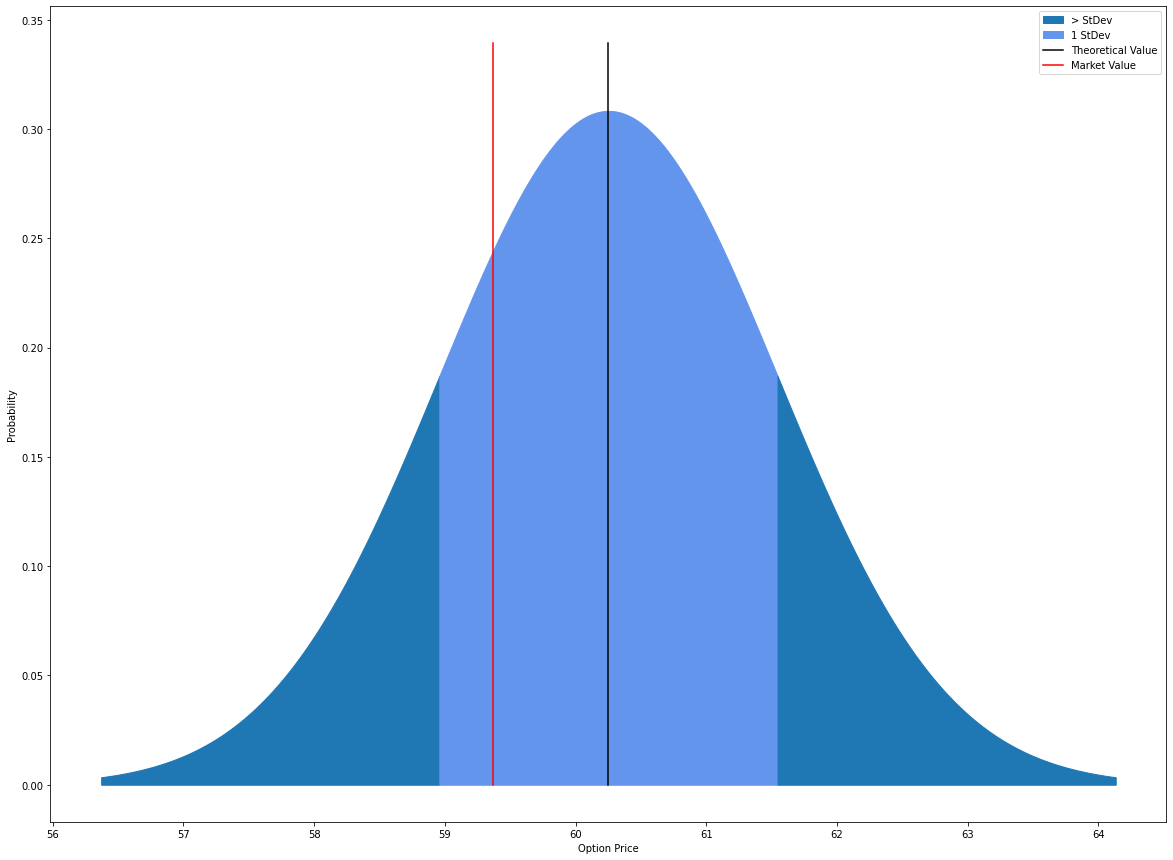

In [81]:
# initial derivative parameters 
S = 158.8          #stock price
K = 100           #strike price
vol = 0.5811        #volatility (%)
r = 0.01            #risk-free rate (%)
N = 10              #number of time steps
M = 1000            #number of simulations

market_value = 59.37 #market price of option
T = ((datetime.date(2022,7,15)-datetime.date(2022,5,2)).days+1)/365    #time in years
#print(T)

#precompute constants
N = 1
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
lnS = np.log(S)

# Monte Carlo Method
Z = np.random.normal(size=(N, M)) 
delta_lnSt = nudt + volsdt*Z 
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )

# Compute Expectation and SE
ST = np.exp(lnSt)
CT = np.maximum(0, ST - K)
C0 = np.exp(-r*T)*np.sum(CT[-1])/M

sigma = np.sqrt( np.sum( (CT[-1] - C0)**2) / (M-1) )
SE = sigma/np.sqrt(M)

print("The market value is 59.37$")
print("Call value computed is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))

x1 = np.linspace(C0-3*SE, C0-1*SE, 100)
x2 = np.linspace(C0-1*SE, C0+1*SE, 100)
x3 = np.linspace(C0+1*SE, C0+3*SE, 100)

s1 = stats.norm.pdf(x1, C0, SE)
s2 = stats.norm.pdf(x2, C0, SE)
s3 = stats.norm.pdf(x3, C0, SE)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev')
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev')
plt.fill_between(x3, s3, color='tab:blue')

plt.plot([C0,C0],[0, max(s2)*1.1], 'k',
        label='Theoretical Value')
plt.plot([market_value,market_value],[0, max(s2)*1.1], 'r',
        label='Market Value')

plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()

As shown in the graph above the computed price is compatible with the market value within the error bar.

## 4) Same as in 3) but applied to Asian options

### Asian call options
An Asian option is an option type where the payoff depends on the average price of the underlying asset over a certain period of time as opposed to standard options (American and European) where the payoff depends on the price of the underlying asset at a specific point in time (maturity). These options allow the buyer to purchase (or sell) the underlying asset at the average price instead of the spot price.
Asian options are also known as average options.

There are various ways to interpret the word “average,” and that needs to be specified in the options contract. Typically, the average price is a geometric or arithmetic average of the price of the underlying asset at discreet intervals, which are also specified in the options contract.

Asian options have relatively low volatility due to the averaging mechanism. They are used by traders who are exposed to the underlying asset over some time, such as consumers and suppliers of commodities, etc.



The payoff function of an Asian call (average price) is given as follows:

$$
payoff(call)= Max(P_{average}- K,0)
$$

Asian options are one of the basic forms of exotic options. One advantage of Asian options is that their costs are cheaper compared to European and American vanilla options since the variation of an average will be much smaller than a terminal price. 

### The code
The values used are $ S_0=100 , \sigma = 20 \%, r=1 \%, T=1year, K=99$.

In [82]:
from scipy.special import erf


def main():
    
    r = 0.01    #The interest rate
    s_0 = 100     #The inital stock price
    drift = 0.1   #The drift, \mu, of the stock
    volatility = 0.2    #The volatility, \sigma, of the stock
    
    dt = 1/365  #The time discretization of the financial model  
    n_mat = 365 #time periods until maturity
    
    #The option parameters
    strike_price = 99

    model = Black_Scholes_Model(dt, r, s_0, drift, volatility)
    
   
    asian_stock_option = Asian_call_option(model, n_mat, strike_price)
   
    Num_trials = 10000
    
    
   
    price_2, error_2 = asian_stock_option.Monte_Carlo_pricer(Num_trials)
   
    print("-----------------------------")
    print("Parameters")
    print("-----------------------------")
    print(f"Initial Stock Price: {s_0}")
    print(f"Interest Rate: {r}")
    print(f"Drift: {drift}")
    print(f"Volatility: {volatility}")
    print(f"Time to Maturity: {n_mat*dt}")
    print(f"Strike Price: {strike_price}")
    print("-----------------------------")
    print(f"Monte-Carlo prices with {Num_trials} trials")
    print("-----------------------------")
    print(f"The Asian Call Option price is: {round(price_2,5)}   (standard error: {round(error_2,5)})")
    
class Black_Scholes_Model:
    
    def __init__(self, dt, interest_rate, s_0, drift, volatility):
        self.dt = dt
        self.interest_rate = interest_rate
        self.s_0 = s_0
        self.drift = drift
        self.volatility = volatility
    
    def stock_path(self,n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.2)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.drift- self.volatility**2/2)*t)
        
        return out
    
    def risk_neutral_stock_path(self, n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price
        from the risk neutral measure at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.1)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.interest_rate- self.volatility**2/2)*t)
        
        return out
        
class Option:
    '''A class forming the basis for the various option classes.
    '''
    def __init__(self, Black_Scholes_Model, n_mat):
            
        self.Black_Scholes_Model = Black_Scholes_Model
        self.n_mat = n_mat
        
    def Monte_Carlo_pricer(self, Num_Trials):
        '''A function for pricing options using Monte Carlo.
        
        Arguments
        ---------
        self = A option with a contract function
        Num_trails = a integer, the number of samples
        
        Returns
        ---------
       A tuple where the first component is the Monte Carlo mean of the contract 
       fucntion and the second component is the standard error.
        '''
        
        dt = self.Black_Scholes_Model.dt 
        r = self.Black_Scholes_Model.interest_rate
        
        samples = np.zeros(Num_Trials)
         
        
        for _ in range(Num_Trials):
            samples[_] = np.exp(-dt*self.n_mat*r)*self.contract(self.Black_Scholes_Model.risk_neutral_stock_path(self.n_mat))
       
        mean = np.sum(samples)/Num_Trials
        var = np.sum((samples - mean)**2)
        
        return mean, np.sqrt(var/(Num_Trials - 1)**2)
    
#Defining various options via inheritance from the Options class. 


class Asian_call_option(Option):

    def __init__(self, Black_Scholes_Model, n_mat, strike_price):
        Option.__init__(self, Black_Scholes_Model, n_mat)
        self.strike_price = strike_price
        
    def contract(self, stock_prices):
        
        average_price = np.sum(stock_prices)/self.n_mat
        
        if average_price > self.strike_price:
            return average_price - self.strike_price
        else:
            return 0
        


        
#Some auxillary functions
                
def brownian(n, dt):
    """ A function to sample a Brownian motion at discrete times
    
    Arguments
    ---------
    n = number of steps being taken
    dt = size of steps
    
    Returns
    -------
    A numpy array sampling the Browian motion at times 0, dt, 2*dt, ... , n*dt.
    """
    #Gnerate random numbers from normal distribution with variance sqrt(dt)
    out = np.random.normal(scale = np.sqrt(dt), size = n+1)
    out[0] = 0
    
    #Cumlative sum to give sample of Brownian path
    out = np.cumsum(out)
    
    return out      

def N(x):
    """Returns the cumulative distribution function for N(0,1) evaluated at x.
    """
    out = (1/2)*(1+erf(x/np.sqrt(2)))    
    
    return out
    

if __name__ == "__main__": main()

-----------------------------
Parameters
-----------------------------
Initial Stock Price: 100
Interest Rate: 0.01
Drift: 0.1
Volatility: 0.2
Time to Maturity: 1.0
Strike Price: 99
-----------------------------
Monte-Carlo prices with 10000 trials
-----------------------------
The Asian Call Option price is: 5.43588   (standard error: 0.07805)


## 5) Modify the existing codes in order to deal with other path dependent options

### Exotic options
Exotic options are a category of options contracts that differ from traditional options in their payment structures, expiration dates, and strike prices. The underlying asset or security can vary with exotic options allowing for more investment alternatives. Exotic options are hybrid securities that are often customizable to the needs of the investor.

Exotic options are a variation of the American and European style options, the most common options contracts available. American options let the holder exercise their rights at any time before or on the expiration date. European options have less flexibility, only allowing the holder to exercise on the expiration date of the contracts. Exotic options are hybrids of American and European options and will often fall somewhere in between these other two styles.

A traditional options contract gives a holder a choice or right to buy or sell the underlying asset at an established price before or on the expiration date. These contracts do not obligate the holder to transact the trade.

The investor has the right to buy the underlying security with a call option, while a put option provides them the ability to sell the underlying security. The process where an option converts to shares is called exercising, and the price at which it converts is the strike price.

An exotic option can vary in terms of how the payoff is determined and when the option can be exercised. These options are generally more complex than plain vanilla call and put options.

Exotic options usually trade in the over-the-counter (OTC) market. The OTC marketplace is a dealer-broker network, as opposed to a large exchange such as the New York Stock Exchange (NYSE).

Further, the underlying asset for an exotic can differ greatly from that of a regular option. Exotic options can be used in trading commodities such as lumber, corn, oil, and natural gas as well as equities, bonds, and foreign exchange. Speculative investors can even bet on the weather or price direction of an asset using a binary option.

Despite their embedded complexities, exotic options have certain advantages over traditional options, which can include: 

- Customized to specific risk-management needs of investors
- A wide variety of investment products to meet investors' portfolio needs
- In some cases, lower premiums than regular options

### Path dependent options

A path dependent option is an exotic option that's value depends not only on the price of the underlying asset but the path that asset took during all or part of the life of the option. There are many types of path-dependent options including Asian, chooser, lookback, and barrier options.

All options give the holder the right, but not the obligation, to buy or sell an underlying asset at a specific price, called the strike, before or at the expiration date. Options define the strike price and expiration date at the onset of the contract. Typically the price the underlying asset is trading at is compared to the strike price to determine profitability. But in a path dependent option, what price is used to determine profitability can vary. Profitability may be based on an average price, or a high or low price, for example.

There are two varieties of path dependent options:
1) Soft path dependent option — bases its value on a single price event that occurred during the life of the option. It could be the highest or lowest traded price of the underlying asset or it could be a triggering event such as the underlying touching a specific price. Option types in this group include barrier options, lookback options, and chooser options.
2) Hard path dependent option — takes into account the entire trading history of the underlying asset. Some options take the average price, sampled at specific intervals. Option types in this group include Asian options, which are also known as average options.

### Lookback  options
A lookback option allows the holder to exercise an option at the most beneficial price of the underlying asset, over the life of the option. 

Also known as a hindsight option, a lookback option allows the holder the advantage of knowing history when determining when to exercise their option. This type of option reduces uncertainties associated with the timing of market entry and reduces the chances the option will expire worthless. Lookback options are expensive to execute, so these advantages come at a cost.

As a type of exotic option, the lookback allows the user to "look back," or review, the prices of an underlying asset over the lifespan of the option after it has been purchased. The holder may then exercise the option based on the most beneficial price of the underlying asset. The holder can take advantage of the widest differential between the strike price and the price of the underlying asset. Lookback options do not trade on major exchanges. Instead, they are unlisted and trade over-the-counter (OTC).

Lookback options are cash-settled options, which means the holder receives a cash settlement at execution based on the most advantageous differential between high and low prices during the purchase period. Sellers of lookback options would price the option at or near the widest expected distance of price differential based on past volatility and demand for the options. The cost to purchase this option would be taken up front. The settlement will equate to the profits they could have made from buying or selling the underlying asset. If the settlement was greater than the initial cost of the option, then the option buyer would have a profit at settlement, otherwise a loss.

The payoff function of an Lookback call option is given as follows:

$$
payoff(call)= Max(S_{T}- S_{min},0)=S_T - S_{min}
$$



### The code
The values used are $ S_0=100 , \sigma = 20 \%, r=1 \%, T=1year, K=99$.

In [73]:


def main():
    
    r = 0.01    #The interest rate
    s_0 = 100     #The inital stock price
    drift = 0.1   #The drift, \mu, of the stock
    volatility = 0.2    #The volatility, \sigma, of the stock
    
    dt = 1/365  #The time discretization of the financial model  
    n_mat = 365 #time periods until maturity
    
    #The option parameters
    strike_price = 99
  
    
    model = Black_Scholes_Model(dt, r, s_0, drift, volatility)
    
   
  
    lookback_option = lookback_European_call_option(model, n_mat, strike_price)
    
    Num_trials = 10000
    
    
  

    price_6, error_6 = lookback_option.Monte_Carlo_pricer(Num_trials)
    
    print("-----------------------------")
    print("Parameters")
    print("-----------------------------")
    print(f"Initial Stock Price: {s_0}")
    print(f"Interest Rate: {r}")
    print(f"Drift: {drift}")
    print(f"Volatility: {volatility}")
    print(f"Time to Maturity: {n_mat*dt}")
    print(f"Strike Price: {strike_price}")
    print("-----------------------------")
    print(f"Monte-Carlo prices with {Num_trials} trials")
    print("-----------------------------")
    print(f"The Lookback  Call Option price is: {round(price_6,5)}   (standard error: {round(error_6,5)})")
    
class Black_Scholes_Model:
    
    def __init__(self, dt, interest_rate, s_0, drift, volatility):
        self.dt = dt
        self.interest_rate = interest_rate
        self.s_0 = s_0
        self.drift = drift
        self.volatility = volatility
    
    def stock_path(self,n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.2)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.drift- self.volatility**2/2)*t)
        
        return out
    
    def risk_neutral_stock_path(self, n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price
        from the risk neutral measure at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.1)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.interest_rate- self.volatility**2/2)*t)
        
        return out
        
class Option:
    '''A class forming the basis for the various option classes.
    '''
    def __init__(self, Black_Scholes_Model, n_mat):
            
        self.Black_Scholes_Model = Black_Scholes_Model
        self.n_mat = n_mat
        
    def Monte_Carlo_pricer(self, Num_Trials):
        '''A function for pricing options using Monte Carlo.
        
        Arguments
        ---------
        self = A option with a contract function
        Num_trails = a integer, the number of samples
        
        Returns
        ---------
       A tuple where the first component is the Monte Carlo mean of the contract 
       fucntion and the second component is the standard error.
        '''
        
        dt = self.Black_Scholes_Model.dt 
        r = self.Black_Scholes_Model.interest_rate
        
        samples = np.zeros(Num_Trials)
         
        
        for _ in range(Num_Trials):
            samples[_] = np.exp(-dt*self.n_mat*r)*self.contract(self.Black_Scholes_Model.risk_neutral_stock_path(self.n_mat))
       
        mean = np.sum(samples)/Num_Trials
        var = np.sum((samples - mean)**2)
        
        return mean, np.sqrt(var/(Num_Trials - 1)**2)
    
#Defining various options via inheritance from the Options class. 



class lookback_European_call_option(Option):
    
    def __init__(self, Black_Scholes_Model, n_mat, strike_price):
        Option.__init__(self, Black_Scholes_Model, n_mat)
        self.strike_price = strike_price
        
        
    def contract(self, stock_prices):
        
        max_price = np.max(stock_prices)
        
        if max_price > self.strike_price:
            return max_price - self.strike_price
        else:
            return 0
        
#Some auxillary functions
                
def brownian(n, dt):
    """ A function to sample a Brownian motion at discrete times
    
    Arguments
    ---------
    n = number of steps being taken
    dt = size of steps
    
    Returns
    -------
    A numpy array sampling the Browian motion at times 0, dt, 2*dt, ... , n*dt.
    """
    #Gnerate random numbers from normal distribution with variance sqrt(dt)
    out = np.random.normal(scale = np.sqrt(dt), size = n+1)
    out[0] = 0
    
    #Cumlative sum to give sample of Brownian path
    out = np.cumsum(out)
    
    return out      

def N(x):
    """Returns the cumulative distribution function for N(0,1) evaluated at x.
    """
    out = (1/2)*(1+erf(x/np.sqrt(2)))    
    
    return out
    

if __name__ == "__main__": main()

-----------------------------
Parameters
-----------------------------
Initial Stock Price: 100
Interest Rate: 0.01
Drift: 0.1
Volatility: 0.2
Time to Maturity: 1.0
Strike Price: 99
-----------------------------
Monte-Carlo prices with 10000 trials
-----------------------------
The Lookback  Call Option price is: 17.71638   (standard error: 0.14687)


### The Up-And-Out Barrier Option 
An up-and-out option is a type of knock-out barrier option that ceases to exist when the price of the underlying security rises above a specific price level, called the barrier price.

If the price of the underlying does not rise above the barrier level, the option acts like any other option—it gives the holder the right but not the obligation to exercise their call or put option at the strike price on or before the expiration date specified in the contract.

Considered an exotic option, an up-and-out option is one of two types of knock-out barrier options. (The other type of knock-out barrier option is a down-and-out option.) Both kinds come in put and call varieties. A barrier option is a type of option where the payoff, and the very existence of the option, depends on whether or not the underlying asset reaches a predetermined price.

A knock-out will expire worthless if the underlying reaches a certain price, limiting profits for the holder and limiting losses for the writer. The critical concept for a knock-out option is that if the underlying asset reaches the barrier at any time during the option's life, the option is knocked out and will not come back into existence. It does not matter if the underlying moves back below pre-knock-out levels.

A barrier option can alternatively be constructed as a knock-in. In contrast to knock-outs, a knock-in option has no value until the underlying reaches a certain price.

Up-and-outs can also be compared with down-and-out options. With a down-and-out option, if the underlying falls below the barrier price, the option ceases to exist.

### The code
The values used are $ S_0=100 , \sigma = 20 \%, r=1 \%, T=1year, K=99, upper-barrier=130, lower-barrier=95$.

In [75]:
def main():
    
    r = 0.01    #The interest rate
    s_0 = 100     #The inital stock price
    drift = 0.1   #The drift, \mu, of the stock
    volatility = 0.2    #The volatility, \sigma, of the stock
    
    dt = 1/365  #The time discretization of the financial model  
    n_mat = 365 #time periods until maturity
    
    #The option parameters
    strike_price = 99
    upper_barrier = 130
    lower_barrier = 95
    
    model = Black_Scholes_Model(dt, r, s_0, drift, volatility)
   
    up_and_out_stock_option = up_and_out_call_option(model, n_mat, strike_price, upper_barrier)
    
    Num_trials = 10000
    
    
    price_3, error_3 = up_and_out_stock_option.Monte_Carlo_pricer(Num_trials)
    
    print("-----------------------------")
    print("Parameters")
    print("-----------------------------")
    print(f"Initial Stock Price: {s_0}")
    print(f"Interest Rate: {r}")
    print(f"Drift: {drift}")
    print(f"Volatility: {volatility}")
    print(f"Time to Maturity: {n_mat*dt}")
    print(f"Strike Price: {strike_price}")
    print(f"Upper Barrier: {upper_barrier}")
    print(f"Lower Barrier: {lower_barrier}")
    print("-----------------------------")
    print(f"Monte-Carlo prices with {Num_trials} trials")
    print("-----------------------------")
   
    print(f"The Up-And-Out Barrier Option price is: {round(price_3,5)}   (standard error: {round(error_3,5)})")
    
class Black_Scholes_Model:
    
    def __init__(self, dt, interest_rate, s_0, drift, volatility):
        self.dt = dt
        self.interest_rate = interest_rate
        self.s_0 = s_0
        self.drift = drift
        self.volatility = volatility
    
    def stock_path(self,n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.2)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.drift- self.volatility**2/2)*t)
        
        return out
    
    def risk_neutral_stock_path(self, n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price
        from the risk neutral measure at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.1)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.interest_rate- self.volatility**2/2)*t)
        
        return out
        
class Option:
    '''A class forming the basis for the various option classes.
    '''
    def __init__(self, Black_Scholes_Model, n_mat):
            
        self.Black_Scholes_Model = Black_Scholes_Model
        self.n_mat = n_mat
        
    def Monte_Carlo_pricer(self, Num_Trials):
        '''A function for pricing options using Monte Carlo.
        
        Arguments
        ---------
        self = A option with a contract function
        Num_trails = a integer, the number of samples
        
        Returns
        ---------
       A tuple where the first component is the Monte Carlo mean of the contract 
       fucntion and the second component is the standard error.
        '''
        
        dt = self.Black_Scholes_Model.dt 
        r = self.Black_Scholes_Model.interest_rate
        
        samples = np.zeros(Num_Trials)
         
        
        for _ in range(Num_Trials):
            samples[_] = np.exp(-dt*self.n_mat*r)*self.contract(self.Black_Scholes_Model.risk_neutral_stock_path(self.n_mat))
       
        mean = np.sum(samples)/Num_Trials
        var = np.sum((samples - mean)**2)
        
        return mean, np.sqrt(var/(Num_Trials - 1)**2)
    
#Defining various options via inheritance from the Options class. 


        
class up_and_out_call_option(Option):
    
    def __init__(self, Black_Scholes_Model, n_mat, strike_price, barrier_price):
        Option.__init__(self, Black_Scholes_Model, n_mat)
        self.barrier_price = barrier_price
        self.strike_price = strike_price
        
    def contract(self, stock_prices):
        
        for price in stock_prices:
            if price > self.barrier_price:
                return 0
            
        if stock_prices[-1] > self.strike_price:
            return stock_prices[-1] - self.strike_price
        else:
            return 0
        
class down_and_out_call_option(Option):
    
    def __init__(self, Black_Scholes_Model, n_mat, strike_price, barrier_price):
        Option.__init__(self, Black_Scholes_Model, n_mat)
        self.barrier_price = barrier_price
        self.strike_price = strike_price
        
    def contract(self, stock_prices):
        
        for price in stock_prices:
            if price < self.barrier_price:
                return 0
            
        if stock_prices[-1] > self.strike_price:
            return stock_prices[-1] - self.strike_price
        else:
            return 0


        
#Some auxillary functions
                
def brownian(n, dt):
    """ A function to sample a Brownian motion at discrete times
    
    Arguments
    ---------
    n = number of steps being taken
    dt = size of steps
    
    Returns
    -------
    A numpy array sampling the Browian motion at times 0, dt, 2*dt, ... , n*dt.
    """
    #Gnerate random numbers from normal distribution with variance sqrt(dt)
    out = np.random.normal(scale = np.sqrt(dt), size = n+1)
    out[0] = 0
    
    #Cumlative sum to give sample of Brownian path
    out = np.cumsum(out)
    
    return out      

def N(x):
    """Returns the cumulative distribution function for N(0,1) evaluated at x.
    """
    out = (1/2)*(1+erf(x/np.sqrt(2)))    
    
    return out
    

if __name__ == "__main__": main()

-----------------------------
Parameters
-----------------------------
Initial Stock Price: 100
Interest Rate: 0.01
Drift: 0.1
Volatility: 0.2
Time to Maturity: 1.0
Strike Price: 99
Upper Barrier: 130
Lower Barrier: 95
-----------------------------
Monte-Carlo prices with 10000 trials
-----------------------------
The Up-And-Out Barrier Option price is: 3.5086   (standard error: 0.06535)


### The Down-And-Out Barrier Option
A down-and-out option is a type of exotic option known as a barrier option. These options define the payout conditions based on whether the price falls enough from the strike price to reach a designated barrier price. What happens at the barrier price depends on what kind of barrier option it is, either knock-in or knock-out.

Considered an exotic option, a down-and-out option is one of two types of knock-out barrier options, the other being an up-and-out option. Both kinds come in the put and call varieties. A barrier option is a type of option where the payoff and the very existence of the option depend on whether or not the underlying asset reaches a predetermined price.

A barrier option can be a knock-out or a knock-in. A knock-out means it expires worthless if the underlying reaches a certain price, limiting profits for the holder and limiting losses for the writer. The barrier option can also be a knock-in. As a knock-in, it has no value until the underlying reaches a certain price.

The critical concept is if the underlying asset reaches the barrier at any time during the option's life, the option is knocked out, or terminated, and will not come back into existence. It does not matter if the underlying moves back to pre-knock-out levels.

A down-and-out option can be a call or put. Both get knocked out if the underlying falls to the barrier price. For an up-and-out option, if the underlying rises to the barrier price, then the option ceases to exist. Both calls and puts cease to exist if the underlying rises to its barrier price.



### The code
The values used are $ S_0=100 , \sigma = 20 \%, r=1 \%, T=1year, K=99, upper-barrier=130, lower-barrier=95$.

In [92]:
def main():
    
    r = 0.01    #The interest rate
    s_0 = 100    #The inital stock price
    drift = 0.1   #The drift, \mu, of the stock
    volatility = 0.2    #The volatility, \sigma, of the stock
    
    dt = 1/365  #The time discretization of the financial model  
    n_mat = 365 #time periods until maturity
    
    #The option parameters
    strike_price = 99
    upper_barrier = 130
    lower_barrier = 95
    
    model = Black_Scholes_Model(dt, r, s_0, drift, volatility)
    down_and_out_stock_option = down_and_out_call_option(model, n_mat, strike_price, lower_barrier)
     
    Num_trials = 10000
    
    
   
    price_4, error_4 = down_and_out_stock_option.Monte_Carlo_pricer(Num_trials)
   
    print("-----------------------------")
    print("Parameters")
    print("-----------------------------")
    print(f"Initial Stock Price: {s_0}")
    print(f"Interest Rate: {r}")
    print(f"Drift: {drift}")
    print(f"Volatility: {volatility}")
    print(f"Time to Maturity: {n_mat*dt}")
    print(f"Strike Price: {strike_price}")
    print(f"Upper Barrier: {upper_barrier}")
    print(f"Lower Barrier: {lower_barrier}")
    print("-----------------------------")
    print(f"Monte-Carlo prices with {Num_trials} trials")
    print(f"The Down-And-Out Barrier Option price is: {round(price_4,5)}   (standard error: {round(error_4,5)})")
   
class Black_Scholes_Model:
    
    def __init__(self, dt, interest_rate, s_0, drift, volatility):
        self.dt = dt
        self.interest_rate = interest_rate
        self.s_0 = s_0
        self.drift = drift
        self.volatility = volatility
    
    def stock_path(self,n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.2)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.drift- self.volatility**2/2)*t)
        
        return out
    
    def risk_neutral_stock_path(self, n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price
        from the risk neutral measure at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.1)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.interest_rate- self.volatility**2/2)*t)
        
        return out
        
class Option:
    '''A class forming the basis for the various option classes.
    '''
    def __init__(self, Black_Scholes_Model, n_mat):
            
        self.Black_Scholes_Model = Black_Scholes_Model
        self.n_mat = n_mat
        
    def Monte_Carlo_pricer(self, Num_Trials):
        '''A function for pricing options using Monte Carlo.
        
        Arguments
        ---------
        self = A option with a contract function
        Num_trails = a integer, the number of samples
        
        Returns
        ---------
       A tuple where the first component is the Monte Carlo mean of the contract 
       fucntion and the second component is the standard error.
        '''
        
        dt = self.Black_Scholes_Model.dt 
        r = self.Black_Scholes_Model.interest_rate
        
        samples = np.zeros(Num_Trials)
         
        
        for _ in range(Num_Trials):
            samples[_] = np.exp(-dt*self.n_mat*r)*self.contract(self.Black_Scholes_Model.risk_neutral_stock_path(self.n_mat))
       
        mean = np.sum(samples)/Num_Trials
        var = np.sum((samples - mean)**2)
        
        return mean, np.sqrt(var/(Num_Trials - 1)**2)
    
#Defining various options via inheritance from the Options class. 


     

class down_and_out_call_option(Option):
    
    def __init__(self, Black_Scholes_Model, n_mat, strike_price, barrier_price):
        Option.__init__(self, Black_Scholes_Model, n_mat)
        self.barrier_price = barrier_price
        self.strike_price = strike_price
        
    def contract(self, stock_prices):
        
        for price in stock_prices:
            if price < self.barrier_price:
                return 0
            
        if stock_prices[-1] > self.strike_price:
            return stock_prices[-1] - self.strike_price
        else:
            return 0


#Some auxillary functions
                
def brownian(n, dt):
    """ A function to sample a Brownian motion at discrete times
    
    Arguments
    ---------
    n = number of steps being taken
    dt = size of steps
    
    Returns
    -------
    A numpy array sampling the Browian motion at times 0, dt, 2*dt, ... , n*dt.
    """
    #Gnerate random numbers from normal distribution with variance sqrt(dt)
    out = np.random.normal(scale = np.sqrt(dt), size = n+1)
    out[0] = 0
    
    #Cumlative sum to give sample of Brownian path
    out = np.cumsum(out)
    
    return out      

def N(x):
    """Returns the cumulative distribution function for N(0,1) evaluated at x.
    """
    out = (1/2)*(1+erf(x/np.sqrt(2)))    
    
    return out
    

if __name__ == "__main__": main()

-----------------------------
Parameters
-----------------------------
Initial Stock Price: 100
Interest Rate: 0.01
Drift: 0.1
Volatility: 0.2
Time to Maturity: 1.0
Strike Price: 99
Upper Barrier: 130
Lower Barrier: 95
-----------------------------
Monte-Carlo prices with 10000 trials
The Down-And-Out Barrier Option price is: 4.91474   (standard error: 0.12232)


### The Double Barrier Option
A double barrier option is a type of binary, or digital option, that involves both an upper and lower trigger price placed on the underlying asset.

A double barrier option will only activate if the price of the underlying touches or closes beyond either trigger level, called the barriers. If either barrier price is touched, the option either becomes valid or invalid, depending on whether it is a knock-in or knock-out type.

In comparison, single barrier options use only an upper or a lower barrier, so a move in the opposite direction would not trigger a knock-in or knock-out event. Barrier options can be constructed as either puts or calls.

Considered an exotic option, a double barrier option is a combination of two single barrier options, with one barrier above and one barrier below the current price of the underlying. It is a bet by the holder that the underlying asset will move significantly, in the case of a knock-in barrier option, or will move by a very small amount, in the case of a knock-out barrier option, over the life of the contract.

Traders use these options when they have an opinion on volatility but not on the direction of the underlying asset's next price move. A barrier option is a type of option where the payoff and the very existence of the option depend on whether or not the underlying asset reaches a predetermined price.

Pricing depends on all regular options metrics with the knock-in or knock-out features adding an extra dimension. European-style allows the exercise of an option only at the expiration date. An American-style option allows the holder to exercise the option at any time on or before expiration.



### The code
The values used are $ S_0=100 , \sigma = 20 \%, r=1 \%, T=1year, K=99, upper-barrier=130, lower-barrier=95$.

In [91]:
def main():
    
    r = 0.01   #The interest rate
    s_0 = 100     #The inital stock price
    drift = 0.1   #The drift, \mu, of the stock
    volatility = 0.2    #The volatility, \sigma, of the stock
    
    dt = 1/365  #The time discretization of the financial model  
    n_mat = 365 #time periods until maturity
    
    #The option parameters
    strike_price = 99
    upper_barrier = 130
    lower_barrier = 95
    
    model = Black_Scholes_Model(dt, r, s_0, drift, volatility)
    
    
    double_barrier_out_stock_option = double_barrier_out_call_option(model, n_mat, strike_price, upper_barrier, lower_barrier)
    
    Num_trials = 10000
    
    
    
    price_5, error_5 = double_barrier_out_stock_option.Monte_Carlo_pricer(Num_trials)
   
    
    print("-----------------------------")
    print("Parameters")
    print("-----------------------------")
    print(f"Initial Stock Price: {s_0}")
    print(f"Interest Rate: {r}")
    print(f"Drift: {drift}")
    print(f"Volatility: {volatility}")
    print(f"Time to Maturity: {n_mat*dt}")
    print(f"Strike Price: {strike_price}")
    print(f"Upper Barrier: {upper_barrier}")
    print(f"Lower Barrier: {lower_barrier}")
    print("-----------------------------")
    print(f"Monte-Carlo prices with {Num_trials} trials")
    print("-----------------------------")
   
    print(f"The Double Barrier Option price is: {round(price_5,5)}   (standard error: {round(error_5,5)})")
    
    
class Black_Scholes_Model:
    
    def __init__(self, dt, interest_rate, s_0, drift, volatility):
        self.dt = dt
        self.interest_rate = interest_rate
        self.s_0 = s_0
        self.drift = drift
        self.volatility = volatility
    
    def stock_path(self,n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.2)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.drift- self.volatility**2/2)*t)
        
        return out
    
    def risk_neutral_stock_path(self, n):
        """Samples from the process statisfying the SDE 
        $$dX = \mu dt +\simga dW$$ according to the real world measure
        
        Returns
        ---------
        A numpy array sampling the stock price
        from the risk neutral measure at times 0, dt, 2*dt, .... , n*dt
        """
        
        t = np.arange(0, (n+0.1)*self.dt, self.dt)
        out = self.s_0*np.exp(self.volatility*brownian(n, self.dt) 
                                + (self.interest_rate- self.volatility**2/2)*t)
        
        return out
        
class Option:
    '''A class forming the basis for the various option classes.
    '''
    def __init__(self, Black_Scholes_Model, n_mat):
            
        self.Black_Scholes_Model = Black_Scholes_Model
        self.n_mat = n_mat
        
    def Monte_Carlo_pricer(self, Num_Trials):
        '''A function for pricing options using Monte Carlo.
        
        Arguments
        ---------
        self = A option with a contract function
        Num_trails = a integer, the number of samples
        
        Returns
        ---------
       A tuple where the first component is the Monte Carlo mean of the contract 
       fucntion and the second component is the standard error.
        '''
        
        dt = self.Black_Scholes_Model.dt 
        r = self.Black_Scholes_Model.interest_rate
        
        samples = np.zeros(Num_Trials)
         
        
        for _ in range(Num_Trials):
            samples[_] = np.exp(-dt*self.n_mat*r)*self.contract(self.Black_Scholes_Model.risk_neutral_stock_path(self.n_mat))
       
        mean = np.sum(samples)/Num_Trials
        var = np.sum((samples - mean)**2)
        
        return mean, np.sqrt(var/(Num_Trials - 1)**2)
    
#Defining various options via inheritance from the Options class. 



class double_barrier_out_call_option(Option):
    
    def __init__(self, Black_Scholes_Model, n_mat, strike_price, upper_barrier, lower_barrier):
        Option.__init__(self, Black_Scholes_Model, n_mat)
        self.strike_price = strike_price
        self.upper_barrier = upper_barrier
        self.lower_barrier = lower_barrier
        
    def contract(self, stock_prices):
        
        for price in stock_prices:
            if price < self.lower_barrier or price > self.upper_barrier:
                return 0
            
        if stock_prices[-1] > self.strike_price:
            return stock_prices[-1] - self.strike_price
        else:
            return 0
        

#Some auxillary functions
                
def brownian(n, dt):
    """ A function to sample a Brownian motion at discrete times
    
    Arguments
    ---------
    n = number of steps being taken
    dt = size of steps
    
    Returns
    -------
    A numpy array sampling the Browian motion at times 0, dt, 2*dt, ... , n*dt.
    """
    #Gnerate random numbers from normal distribution with variance sqrt(dt)
    out = np.random.normal(scale = np.sqrt(dt), size = n+1)
    out[0] = 0
    
    #Cumlative sum to give sample of Brownian path
    out = np.cumsum(out)
    
    return out      

def N(x):
    """Returns the cumulative distribution function for N(0,1) evaluated at x.
    """
    out = (1/2)*(1+erf(x/np.sqrt(2)))    
    
    return out
    

if __name__ == "__main__": main()

-----------------------------
Parameters
-----------------------------
Initial Stock Price: 100
Interest Rate: 0.01
Drift: 0.1
Volatility: 0.2
Time to Maturity: 1.0
Strike Price: 99
Upper Barrier: 130
Lower Barrier: 95
-----------------------------
Monte-Carlo prices with 10000 trials
-----------------------------
The Double Barrier Option price is: 1.2189   (standard error: 0.04436)


## Bibliography and usefull links where to find the codes used:
- https://www.investopedia.com/terms/e/exoticoption.asp
- https://www.investopedia.com/terms/p/pathdependentoption.asp
- https://github.com/W-J-Trenberth/Exotix-option-pricing-by-Monte-Carlo/blob/master/Monte_Carlo_Pricer.py
- https://www.investopedia.com/terms/l/lookbackoption.asp
- https://www.investopedia.com/terms/u/up-and-outoption.asp
- https://www.investopedia.com/terms/d/daoo.asp
- https://www.investopedia.com/terms/d/doublebarrieroption.asp
- https://www.youtube.com/watch?v=pR32aii3shk&t=459s
- https://asxportfolio.com/options-monte-carlo-intro-to-valuing-financial-derivatives
- https://asxportfolio.com/options-stochastic-calculus-simulating-gbm
- Hull J.C. << Options,Futures  and  Other Derivatives ninth Edition>> (15th January 2014)
- Yuxing Yan << Python for Finance , Second Edition >> ( June 2017)